# Cardiotocography : A Machine Learning Project

## by Hana Shah

<a id="intro"></a>
# 1. Introduction

This is a machine learning project which focuses on a cardiotocogram dataset to predict the state of patients' fetus using supervised machine learning models such as decision tree and k-Nearest neighbors. The performance of the ML models are compared. This project uses several Python libraries such as:

- Pandas (for Data Acquisition)
- Numpy 
- MatPlotlib & Seaborn (for Data Visualization)
- imblearn (for Oversampling)
- sklearn (for Feature Selection, Model Building, Cross Validation, Model Evaluation)

# Table of Contents

1. [Introduction](#intro)
2. [Data Acquisition](#2-data-acquisition)
3. [Data Cleaning](#3-data-cleaning)
4. [Exploratory Data Analysis](#4-exploratory-data-analysis)
5. [Feature Selection](#5-feature-selection)
6. [Handling Class Imbalance](#6-handling-class-imbalance)
7. [Model Training & Validation](#7-model-training--validation)
8. [Model Prediction](#8-model-prediction)
9. [Hyperparameter Tuning](#9-hyperparameter-tuning)
10. [Conclusion](#10-conclusion)

<a id="dataq"></a>
# 2. Data Acquisition

#### Dataset Description
The dataset was obtained based on 2126 cardiotocograms processed and the respective diagnostic features were measured. The dataset was classified by three expert obstetricians and it shows the data on normal, suspicious and pathological fetuses. The dataset contains 23 columns including the cardiotocography information of 2126 fetuses. The attributes of the dataset are as below:
| Attribute | Description |
|-----------|-------------|
| **LB**    | FHR baseline (beats per minute) |
| **AC**    | Number of accelerations per second |
| **FM**    | Number of fetal movements per second |
| **UC**    | Number of uterine contractions per second |
| **DL**    | Number of light decelerations per second |
| **DS**    | Number of severe decelerations per second |
| **DP**    | Number of prolonged decelerations per second |
| **ASTV**  | Percentage of time with abnormal short-term variability |
| **MSTV**  | Mean value of short-term variability |
| **ALTV**  | Percentage of time with abnormal long-term variability |
| **MLTV**  | Mean value of long-term variability |
| **Width** | Width of FHR histogram |
| **Min**   | Minimum of FHR histogram |
| **Max**   | Maximum of FHR histogram |
| **Nmax**  | Number of histogram peaks |
| **Nzeros**| Number of histogram zeros |
| **Mode**  | Histogram mode |
| **Mean**  | Histogram mean |
| **Median**| Histogram median |
| **Variance** | Histogram variance |
| **Tendency** | Histogram tendency |
| **CLASS**    | FHR pattern class code (1 to 10) |
| **NSP**      | Fetal state class code (N=normal; S=suspect; P=pathologic) |

#### Importing Libraries
Importing all libraries needed. More libraries will be imported if required.

In [71]:
# import the standard modules
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# create dictionary for categorical column
cardio_dtypes = {"NSP": "category"} 

# reading the file
cardio = pd.read_csv("ctg.csv", dtype=cardio_dtypes)
cardio.head()

LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    Max  Nmax  \
0  120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  126.0   2.0   
1  132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  198.0   6.0   
2  133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  198.0   5.0   
3  134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  170.0  11.0   
4  132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  170.0   9.0   

   Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  NSP  
0     0.0  120.0  137.0   121.0      73.0       1.0    9.0    2  
1     1.0  141.0  136.0   140.0      12.0       0.0    6.0    1  
2     1.0  141.0  135.0   138.0      13.0       0.0    6.0    1  
3     0.0  137.0  134.0   137.0      13.0       1.0    6.0    1  
4     0.0  137.0  136.0   138.0      11.0       1.0    2.0    1  

[5 rows x 23 columns]

The column NSP is a categorical column. Converting the data type of this column to 'category' can significantly reduce memory usage.

In [73]:
# getting the columns of the dataset
columns = list(cardio.columns)
columns

['LB',
 'AC',
 'FM',
 'UC',
 'ASTV',
 'MSTV',
 'ALTV',
 'MLTV',
 'DL',
 'DS',
 'DP',
 'Width',
 'Min',
 'Max',
 'Nmax',
 'Nzeros',
 'Mode',
 'Mean',
 'Median',
 'Variance',
 'Tendency',
 'CLASS',
 'NSP']

In [74]:
# check datatype in each column, all data types are correct
print("Column datatypes: ")
print(cardio.dtypes)

Column datatypes: 
LB           float64
AC           float64
FM           float64
UC           float64
ASTV         float64
MSTV         float64
ALTV         float64
MLTV         float64
DL           float64
DS           float64
DP           float64
Width        float64
Min          float64
Max          float64
Nmax         float64
Nzeros       float64
Mode         float64
Mean         float64
Median       float64
Variance     float64
Tendency     float64
CLASS        float64
NSP         category
dtype: object


In [75]:
# checking the number of rows and columns
cardio.shape

(2129, 23)

In [76]:
# display the statistics of the data
cardio.describe().T

count        mean        std    min    25%    50%    75%    max
LB        2126.0  133.303857   9.840844  106.0  126.0  133.0  140.0  160.0
AC        2126.0    2.722484   3.560850    0.0    0.0    1.0    4.0   26.0
FM        2127.0    7.503056  39.030452    0.0    0.0    0.0    2.0  564.0
UC        2127.0    3.669017   2.877148    0.0    1.0    3.0    5.0   23.0
ASTV      2127.0   47.008933  17.210648   12.0   32.0   49.0   61.0   87.0
MSTV      2127.0    1.335449   0.891543    0.2    0.7    1.2    1.7    7.0
ALTV      2127.0    9.884814  18.476534    0.0    0.0    0.0   11.0   91.0
MLTV      2127.0    8.207616   5.701926    0.0    4.6    7.4   10.8   50.7
DL        2128.0    1.576128   2.517794    0.0    0.0    0.0    3.0   16.0
DS        2128.0    0.003759   0.061213    0.0    0.0    0.0    0.0    1.0
DP        2128.0    0.127820   0.471687    0.0    0.0    0.0    0.0    4.0
Width     2126.0   70.445908  38.955693    3.0   37.0   67.5  100.0  180.0
Min       2126.0   93.579492  29.560212   50.0   67.0   93.0  120.0  159.0
Max       2126.0  164.025400  17.944183  122.0  152.0  162.0  174.0  238.0
Nmax      2126.0    4.068203   2.949386    0.0    2.0    3.0    6.0   18.0
Nzeros    2126.0    0.323612   0.706059    0.0    0.0    0.0    0.0   10.0
Mode      2126.0  137.452023  16.381289   60.0  129.0  139.0  148.0  187.0
Mean      2126.0  134.610536  15.593596   73.0  125.0  136.0  145.0  182.0
Median    2126.0  138.090310  14.466589   77.0  129.0  139.0  148.0  186.0
Variance  2126.0   18.808090  28.977636    0.0    2.0    7.0   24.0  269.0
Tendency  2126.0    0.320320   0.610829   -1.0    0.0    0.0    1.0    1.0
CLASS     2126.0    4.509878   3.026883    1.0    2.0    4.0    7.0   10.0

In [77]:
# display the information of the dataset
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   LB        2126 non-null   float64 
 1   AC        2126 non-null   float64 
 2   FM        2127 non-null   float64 
 3   UC        2127 non-null   float64 
 4   ASTV      2127 non-null   float64 
 5   MSTV      2127 non-null   float64 
 6   ALTV      2127 non-null   float64 
 7   MLTV      2127 non-null   float64 
 8   DL        2128 non-null   float64 
 9   DS        2128 non-null   float64 
 10  DP        2128 non-null   float64 
 11  Width     2126 non-null   float64 
 12  Min       2126 non-null   float64 
 13  Max       2126 non-null   float64 
 14  Nmax      2126 non-null   float64 
 15  Nzeros    2126 non-null   float64 
 16  Mode      2126 non-null   float64 
 17  Mean      2126 non-null   float64 
 18  Median    2126 non-null   float64 
 19  Variance  2126 non-null   float64 
 20  Tendency

<a id="datac"></a>
# 3. Data Cleaning
Based on the original dataset, there are three rows that have empty cells. Since each row has more than one empty cell and the missing values constitute less than 5% of the dataset, they were handled by deleting the rows.

In [78]:
# check the number of missing values in each column
cardio.isna().sum()

LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
CLASS       3
NSP         3
dtype: int64

In [79]:
# drop the bottom three rows that contain the missing values
cardio = cardio.drop(labels=[2126,2127,2128], axis=0)
cardio

LB   AC   FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    Max  \
0     120.0  0.0  0.0  0.0  73.0   0.5  43.0   2.4  0.0  0.0  ...  126.0   
1     132.0  4.0  0.0  4.0  17.0   2.1   0.0  10.4  2.0  0.0  ...  198.0   
2     133.0  2.0  0.0  5.0  16.0   2.1   0.0  13.4  2.0  0.0  ...  198.0   
3     134.0  2.0  0.0  6.0  16.0   2.4   0.0  23.0  2.0  0.0  ...  170.0   
4     132.0  4.0  0.0  5.0  16.0   2.4   0.0  19.9  0.0  0.0  ...  170.0   
...     ...  ...  ...  ...   ...   ...   ...   ...  ...  ...  ...    ...   
2121  140.0  0.0  0.0  6.0  79.0   0.2  25.0   7.2  0.0  0.0  ...  177.0   
2122  140.0  1.0  0.0  9.0  78.0   0.4  22.0   7.1  0.0  0.0  ...  169.0   
2123  140.0  1.0  0.0  7.0  79.0   0.4  20.0   6.1  0.0  0.0  ...  170.0   
2124  140.0  1.0  0.0  9.0  78.0   0.4  27.0   7.0  0.0  0.0  ...  169.0   
2125  142.0  1.0  1.0  5.0  74.0   0.4  36.0   5.0  0.0  0.0  ...  159.0   

      Nmax  Nzeros   Mode   Mean  Median  Variance  Tendency  CLASS  NSP  
0      2.0     0.0  120.0  137.0   121.0      73.0       1.0    9.0    2  
1      6.0     1.0  141.0  136.0   140.0      12.0       0.0    6.0    1  
2      5.0     1.0  141.0  135.0   138.0      13.0       0.0    6.0    1  
3     11.0     0.0  137.0  134.0   137.0      13.0       1.0    6.0    1  
4      9.0     0.0  137.0  136.0   138.0      11.0       1.0    2.0    1  
...    ...     ...    ...    ...     ...       ...       ...    ...  ...  
2121   4.0     0.0  153.0  150.0   152.0       2.0       0.0    5.0    2  
2122   6.0     0.0  152.0  148.0   151.0       3.0       1.0    5.0    2  
2123   5.0     0.0  153.0  148.0   152.0       4.0       1.0    5.0    2  
2124   6.0     0.0  152.0  147.0   151.0       4.0       1.0    5.0    2  
2125   2.0     1.0  145.0  143.0   145.0       1.0       0.0    1.0    1  

[2126 rows x 23 columns]

In [80]:
# check again the number of missing values in each column
cardio.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [11]:
# view duplicate data
print(cardio[cardio.duplicated()])

         LB   AC    FM   UC  ASTV  MSTV  ALTV  MLTV   DL   DS  ...    Max  \
68    140.0  5.0   0.0  3.0  34.0   1.2   0.0  10.3  0.0  0.0  ...  179.0   
234   123.0  0.0   0.0  0.0  49.0   0.8   7.0  13.8  0.0  0.0  ...  137.0   
306   145.0  0.0  13.0  0.0  77.0   0.2  45.0   5.8  0.0  0.0  ...  150.0   
319   150.0  0.0  10.0  0.0  79.0   0.2  84.0   2.8  0.0  0.0  ...  152.0   
324   135.0  0.0   0.0  0.0  62.0   0.5  71.0   6.9  0.0  0.0  ...  168.0   
333   144.0  0.0  15.0  0.0  76.0   0.4  61.0  10.6  0.0  0.0  ...  152.0   
787   123.0  3.0   4.0  0.0  52.0   0.8   2.0  15.4  0.0  0.0  ...  140.0   
791   123.0  2.0   3.0  0.0  50.0   0.9   4.0  14.8  0.0  0.0  ...  140.0   
798   146.0  0.0   0.0  4.0  65.0   0.4  39.0   7.0  0.0  0.0  ...  156.0   
1114  122.0  0.0   0.0  0.0  19.0   1.9   0.0  15.1  0.0  0.0  ...  142.0   
1115  122.0  0.0   0.0  0.0  19.0   1.9   0.0  15.1  0.0  0.0  ...  142.0   
1458  148.0  2.0   0.0  1.0  40.0   0.9   0.0  10.6  0.0  0.0  ...  171.0   

In data analysis, a duplicate is typically a record that is identical to another record in one or more aspects. There are several types of duplicates, and the definition can vary depending on the context and requirements of the analysis.
1. Exact Duplicates: Rows that are identical across all columns. Every value in each column of one row is exactly the same as the corresponding value in another row.
2. Partial Duplicates: Rows that are identical in certain columns but may differ in others. This might happen if, for example, two rows share the same customer_id and order_date but differ slightly in other fields due to minor variations or data entry issues.
3. Approximate Duplicates (Fuzzy Duplicates): Rows that are very similar but not identical due to slight variations, such as spelling errors or minor numerical differences. 
4. Logical Duplicates: Rows that are technically different but represent the same entity or event. For instance, two records may have different timestamps but represent updates to the same event or measurement.

Based on the output above, there are 12 partially duplicate data. In my opinion, i think in medical datasets, it's common to see similar values for certain measurements across different patients, especially in cases where individuals may share similar health conditions whatsoever. Therefore, similar or identical values in several columns do not necessarily mean these rows are duplicates. Thus, the duplicate data are not removed.

<a id="datav"></a>
# 4. Exploratory Data Analysis

In [12]:
# import the necessary libraries
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
# check distribution of the target variable
cardio['NSP'].value_counts(normalize=True)

NSP
1    0.778457
2    0.138758
3    0.082785
Name: proportion, dtype: float64

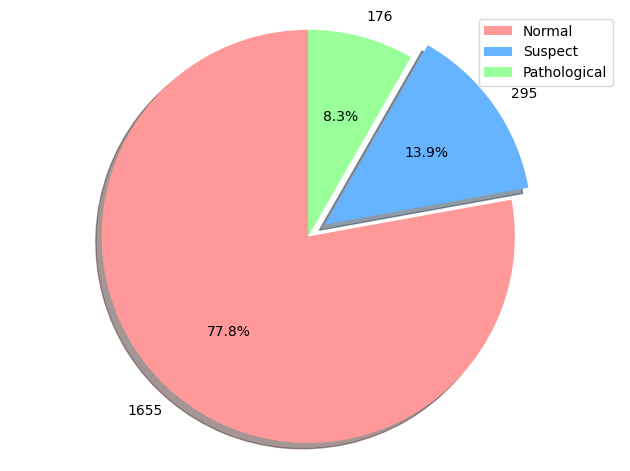

In [32]:
# display the distribution of the data
value = np.array(cardio['NSP'].value_counts())
label = ["Normal", "Suspect", "Pathological"]
sizes = np.array(cardio['NSP'].value_counts())
explode = (0, 0.1, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=value, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.legend(label)
plt.show()

Based on the output above, the original dataset is highly imbalanced. This is a common occurence in medical datasets, where most of the data are 'Normal'. If we use this data as the base for the predictive models and analysis, there might be a lot of errors and the algorithms will probably overfit since it will "assume" that most fetuses are normal. To prevent this bias, we need to balance the dataset.

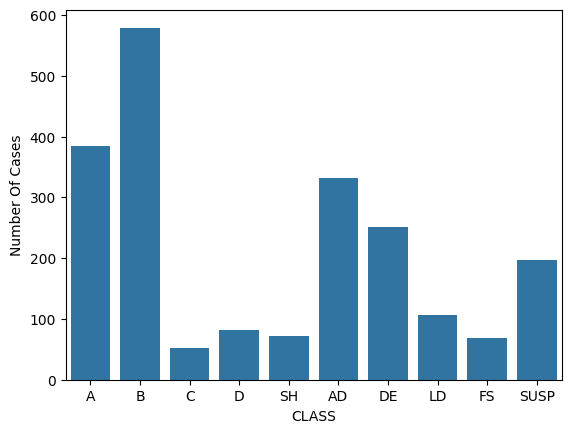

In [58]:
# display total cases by class
sns.countplot(data=cardio, x="CLASS") 
N = 10
ind = np.arange(N) 
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.ylabel("Number Of Cases")
plt.show() 

The FHR pattern class code (1-10) is represented by the actual classes. These abbreviations are often used in clinical settings to classify CTG patterns to monitor fetal well-being. For example, LD stands for 'Late Deceleration' and FS stands for 'Fetal Sleep'. Based on the chart above, majority of the cases is represented by the fetus classes B, A, AD, and DE.

- **A**: calm sleep
- **B**: REM sleep
- **C**: calm vigilance
- **D**: active vigilance
- **SH**: shift pattern (A or Susp with shifts)
- **AD**: accelerative/decelerative pattern (stress situation)
- **DE**: decelerative pattern (vagal stimulation)
- **LD**: largely decelerative pattern
- **FS**: flat-sinusoidal pattern (pathological state)
- **SUSP**: suspect pattern

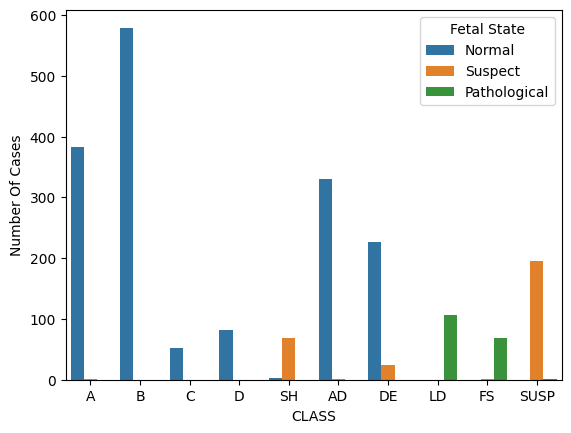

In [59]:
# display fetal state by class
sns.countplot(data=cardio, x="CLASS", hue="NSP") 
N = 10
ind = np.arange(N) 
plt.xticks(ind, ('A', 'B', 'C', 'D', 'SH', 'AD', 'DE', 'LD', 'FS', 'SUSP'))
plt.legend(title="Fetal State", labels=["Normal", "Suspect", "Pathological"])
plt.ylabel("Number Of Cases")
plt.show() 

SUSP class contains a wide majority of cases classified as suspect, and LD and FS are mostly composed of cases classified as pathological. Meanwhile, SH class contains more cases classified as suspect than normal. The rest of the cases are mostly or entirely composed of cases classified as normal.

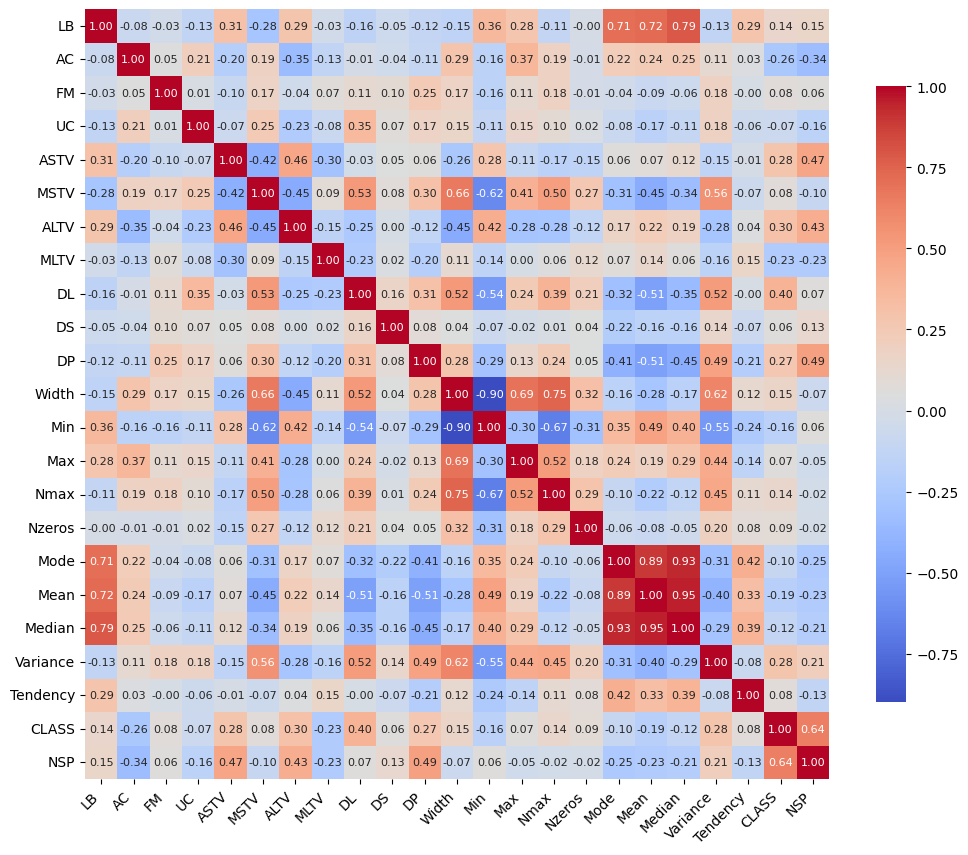

In [60]:
# check correlation of the numerical features
plt.figure(figsize=(12, 10))  # Increase figure size
sns.heatmap(cardio.corr(), annot=True, fmt=".2f", cmap="coolwarm", 
            annot_kws={"size": 8},  # Adjust annotation font size
            cbar_kws={'shrink': .8})  # Shrink color bar to fit better
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.show()

Correlation describes direction and strength of relationship between two variables. A negative correlation coefficient indicates that as one variable increases, the other decreases. A value closer to zero is indicative of a weak relationship, while values closer to one or negative one indicate stronger relationships. 

Based on the output above, it can be seen that there is a strong positive correlation between Mode and Mean as well as between Mode and Median. Besides, there is also a strong negative correlation between ASTV and MSTV.

The heatmap here only shows linear correlations between the variables, which are captured by the Pearson correlation coefficient. However, relationships between variables can also be non-linear, and these won't be detected by the correlation coefficient alone. It can be detected using a scatter plot.

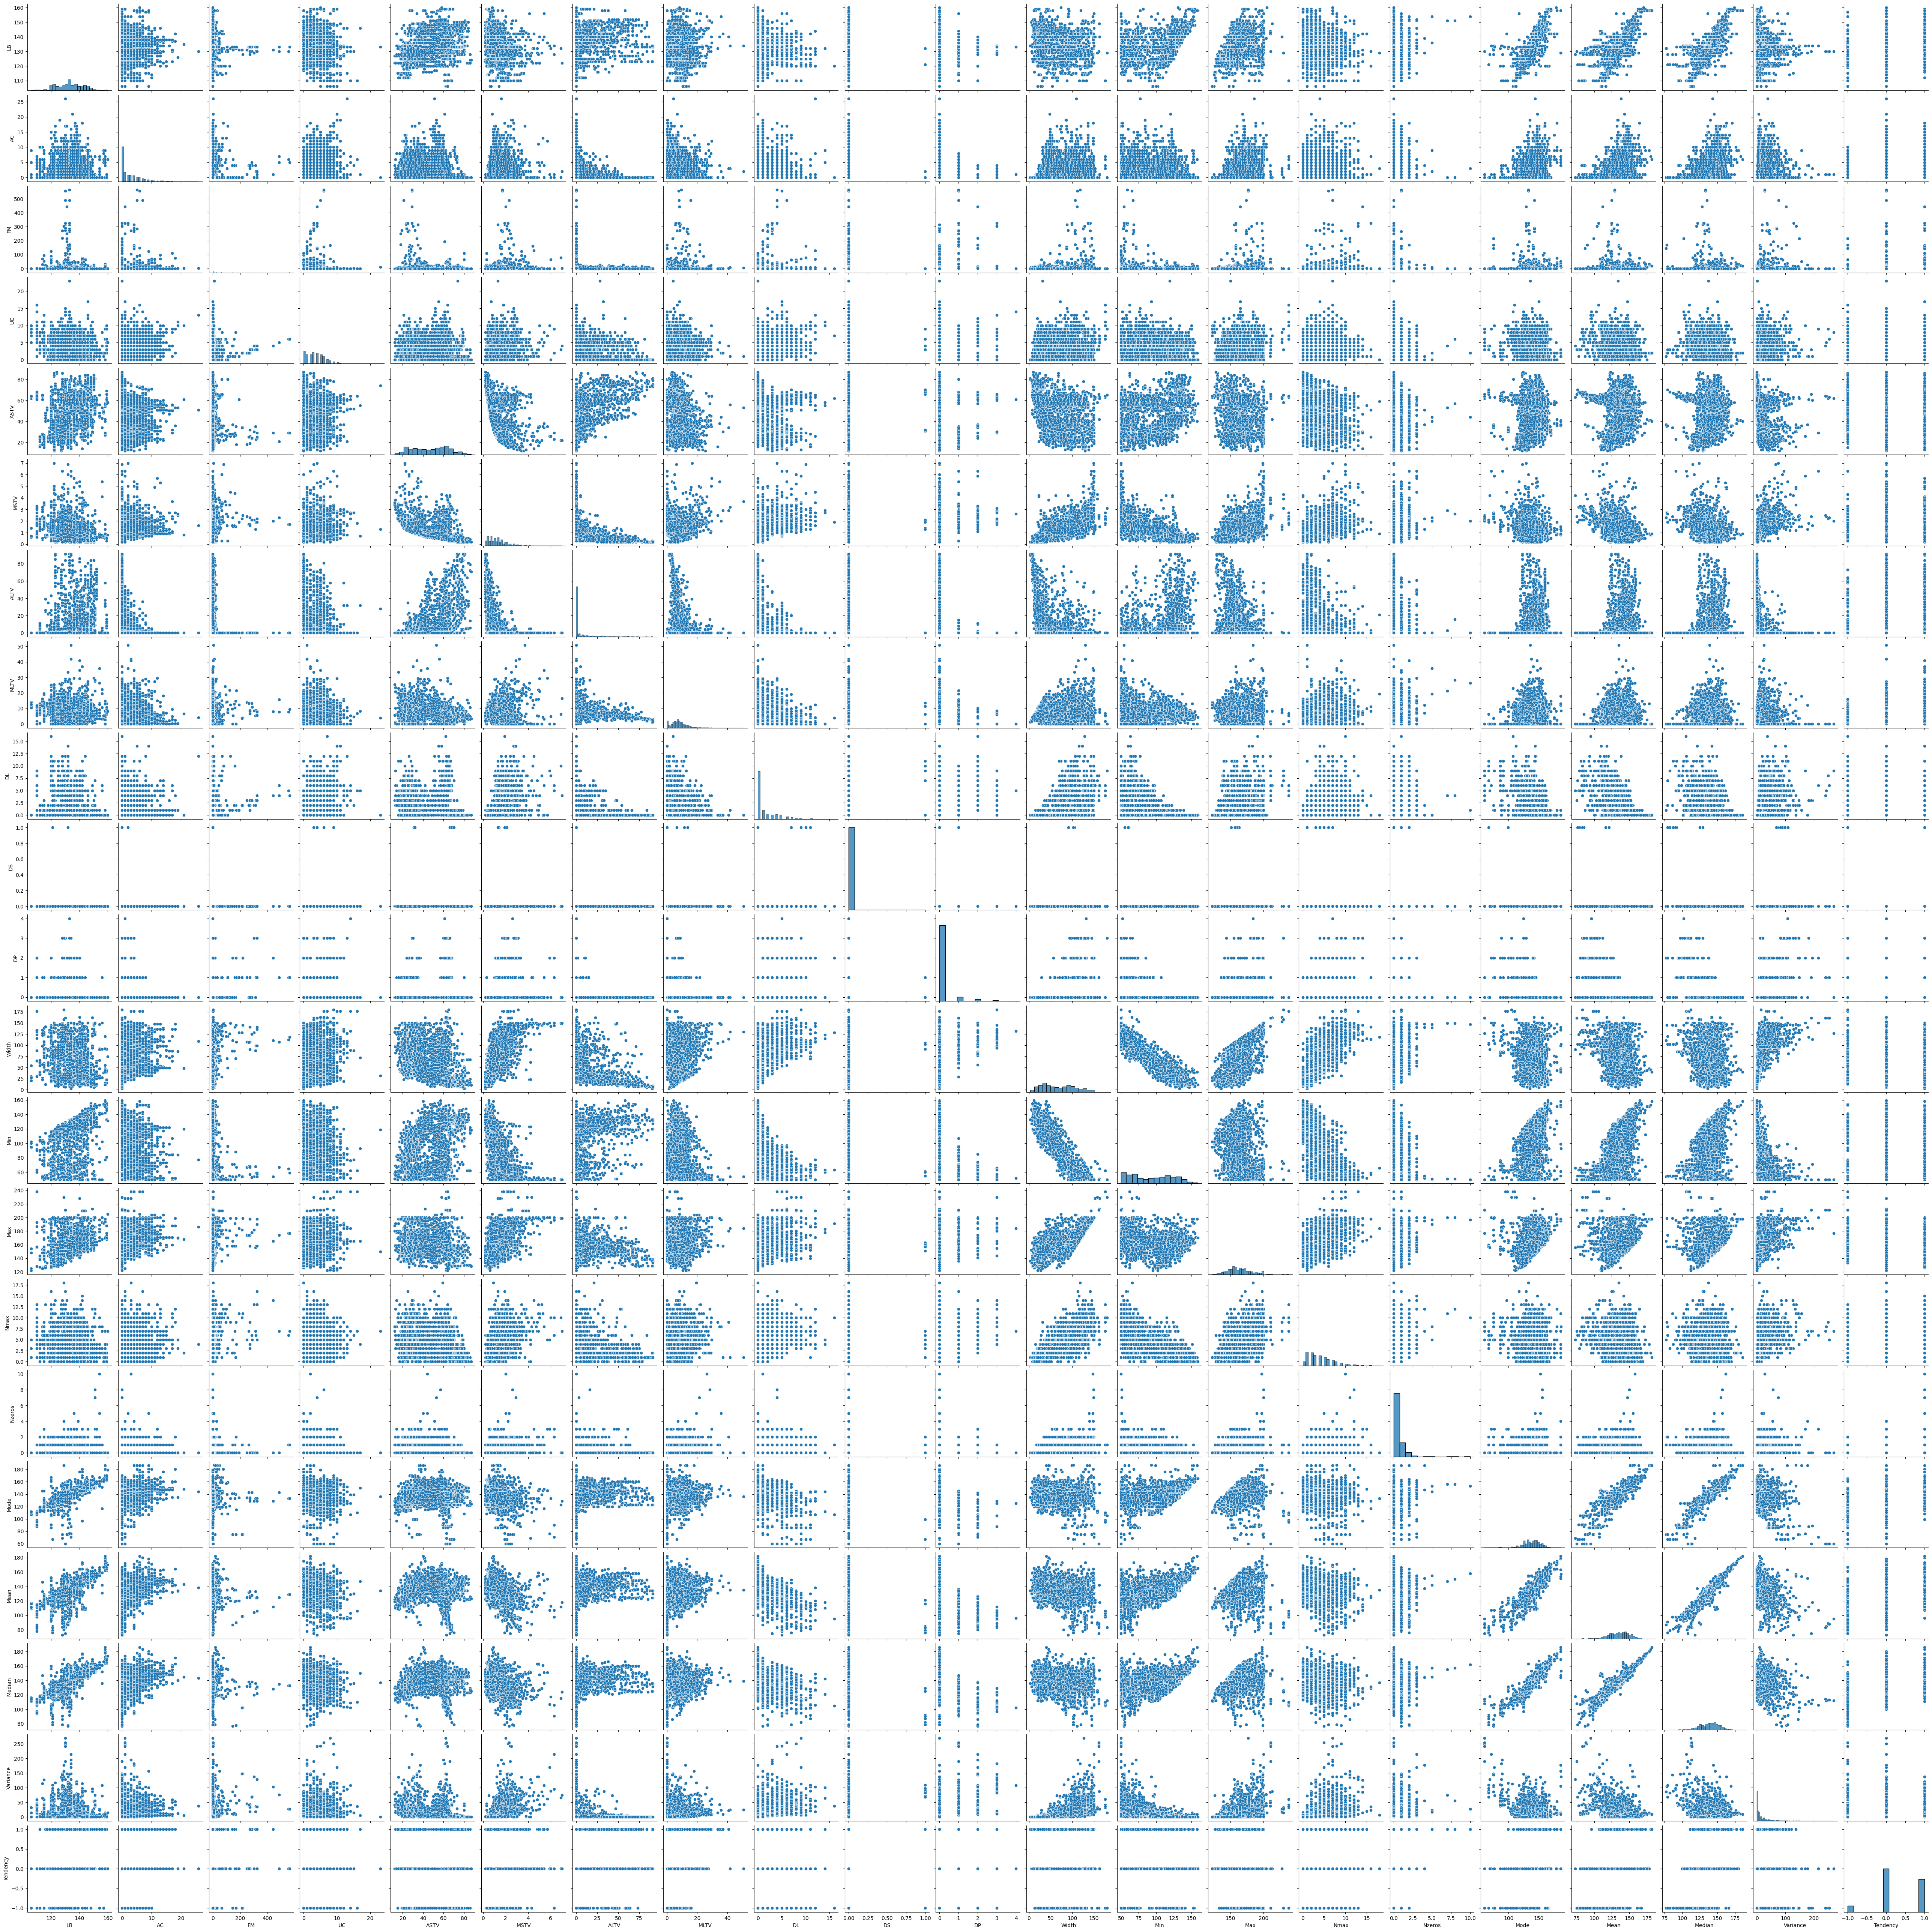

In [16]:
sns.pairplot(data=cardio) 
plt.show() 

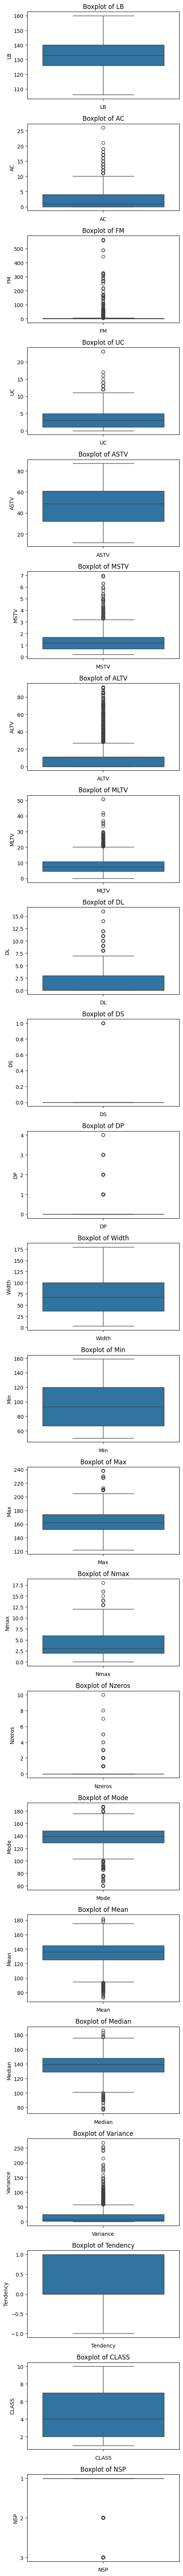

In [61]:
# check for outliers
plt.figure(figsize=(5, len(cardio.columns) * 3))

for i, feature in enumerate(cardio.columns):
    plt.subplot(len(cardio.columns), 1, i + 1)  # Create a subplot for each feature
    sns.boxplot(data=cardio, y=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

Most of the features have a lot of outliers. We'll leave them for now.

<a id="featuresel"></a>
# 5. Feature Selection

Feature selection is to select a subset of relevant features for building the predictive models. The feature selection method used is ANOVA because we're dealing with numerical input variable and categorical output variable. Also, this method is used because this is a multiclass classification problem.

Note: I am still confused on the order, whether we should perform feature selection first or oversampling first. It is unclear which order is better.

In [46]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler

In [85]:
# Set the input and response variable
X = cardio.iloc[:, 0:22] 
y = cardio.iloc[:,-1]

In [86]:
# Scale the features because they have varying ranges
Scaler=StandardScaler()
X_value=Scaler.fit_transform(X)

### Feature Selection Using Anova (Analysis Of Variance) or F-Test

In [87]:
# anova f-test feature selection for numerical data (its done on the original data without sampling)
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_value, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
features_score = pd.DataFrame(fs.scores_)
features = pd.DataFrame(X.columns)
feature_score = pd.concat([features,features_score],axis=1)
feature_score.columns = ["Input_Features","Score"]
print(feature_score.nlargest(10,columns="Score"))

   Input_Features       Score
21          CLASS  738.596837
10             DP  467.882575
4            ASTV  281.835352
17           Mean  254.275705
6            ALTV  245.337451
16           Mode  230.937845
18         Median  211.995039
1              AC  130.720237
19       Variance  124.450809
5            MSTV   98.517580


The 10 best features obtained are CLASS, DP, ASTV, Mean, ALTV, Mode, Median, AC, Variance, MSTV.

In [117]:
# X value and y value
y_model = cardio['NSP']
X_model = cardio[['CLASS', 'DP', 'ASTV', 'Mean', 'ALTV', 'Mode', 'Median', 'AC', 'Variance', 'MSTV']]

<a id="classb"></a>
# 6. Handling Class Imbalance
Based on the EDA done, the target variable (NSP) is highly imbalanced. This can skew the model’s learning process because it may prioritize the majority class (Normal), leading to poor performance on the minority class (Pathological). Therefore, we need to address this class imbalance.

In [118]:
# Method 1: SMOTE
from imblearn.over_sampling import SMOTE

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [133]:
# check the new class distribution
from collections import Counter
print("Original distribution:", Counter(y_train))
print("Resampled distribution:", Counter(y_train_resampled))
print("Test distribution:", Counter(y_test))

Original distribution: Counter({'1': 1240, '2': 216, '3': 138})
Resampled distribution: Counter({'1': 1240, '3': 1240, '2': 1240})
Test distribution: Counter({'1': 415, '2': 79, '3': 38})


 One of the ways to handle imbalanced datasets is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data that can be used for training the model. 

 It’s important to generate the new samples only in the training set to ensure the model generalizes well to unseen data.

<a id="modeltrain"></a>
# 7. Model Training & Validation

In [120]:
# Use the resampled data as TRAINING SET ONLY
print(X_train_resampled.shape)
print(X_test.shape)

(3720, 10)
(532, 10)


### k-Nearest Neighbors

In [121]:
# Fitting KNN into the training set and test set
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=1, weights='uniform') 
model_knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier(n_neighbors=1)

#### Model Validation
Cross validation techniques are used for model validation to assess the model's performance more robustly.

In [122]:
# Method 1: k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

# Perform cross-validation
k_folds = KFold(n_splits = 5)
cv_scores = cross_val_score(model_knn, X_train_resampled, y_train_resampled, cv=k_folds)  
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

Cross-Validation Scores: [0.93817204 0.94892473 0.96639785 0.99327957 0.9811828 ]
Mean CV Score: 0.9655913978494624


### Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12,
                       min_samples_split = 7, random_state = 0) 
model_dt.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=7,
                       random_state=0)

#### Model Validation

In [124]:
# Method 1: k-fold cross validation
from sklearn.model_selection import KFold, cross_val_score

# Perform cross-validation
k_folds = KFold(n_splits = 5)
cv_scores = cross_val_score(model_dt, X_train_resampled, y_train_resampled, cv=k_folds)  
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

Cross-Validation Scores: [0.97715054 0.98655914 0.97177419 0.98655914 1.        ]
Mean CV Score: 0.9844086021505376


<a id="modelpred"></a>
# 8. Model Prediction
Test set is used for prediction. For imbalanced datasets, using accuracy as an evaluation metric can be misleading as it doesn't consider the nuances of classification. For example, it can correctly predict all the majority cases (Normal) but incorrectly predict the minority cases (Pathological) but achieve a high accuracy. Therefore, we can use metrics that provide better insights such as F1 Score, Recall (TP Rate) or Precision.

- **Precision**: 
  - The number of true positives divided by all positive predictions.
  - Also called Positive Predictive Value.
  - Measures a classifier’s exactness.
  - Low precision indicates a high number of false positives.

- **Recall**: 
  - The number of true positives divided by the number of positive values in the test data.
  - Also called Sensitivity or True Positive Rate.
  - Measures a classifier’s completeness.
  - Low recall indicates a high number of false negatives.

- **F1 Score**: 
  - The weighted average of precision and recall.


### k-Nearest Neighbors

In [125]:
y_pred_knn = model_knn.predict(X_test)

In [132]:
# print results
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("Classification Report: ")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:")
print(accuracy_score(y_test, y_pred_knn))
print("F1 Score:")
print(f1_score(y_test, y_pred_knn, average="weighted"))
print("Recall:")
print(recall_score(y_test, y_pred_knn, average="weighted"))

Confusion Matrix:
[[404  10   1]
 [ 12  67   0]
 [  2   5  31]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       415
           2       0.82      0.85      0.83        79
           3       0.97      0.82      0.89        38

    accuracy                           0.94       532
   macro avg       0.92      0.88      0.90       532
weighted avg       0.94      0.94      0.94       532

Accuracy:
0.943609022556391
F1 Score:
0.9435220181567232
Recall:
0.943609022556391


### Decision Tree

In [129]:
y_pred_dt = model_dt.predict(X_test)

In [131]:
# print results
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report: ")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:")
print(accuracy_score(y_test, y_pred_dt))
print("F1 Score:")
print(f1_score(y_test, y_pred_dt, average="weighted"))
print("Recall:")
print(recall_score(y_test, y_pred_dt, average="weighted"))

Confusion Matrix:
[[408   7   0]
 [  1  77   1]
 [  0   1  37]]
Classification Report: 
              precision    recall  f1-score   support

           1       1.00      0.98      0.99       415
           2       0.91      0.97      0.94        79
           3       0.97      0.97      0.97        38

    accuracy                           0.98       532
   macro avg       0.96      0.98      0.97       532
weighted avg       0.98      0.98      0.98       532

Accuracy:
0.981203007518797
F1 Score:
0.9814921064204438
Recall:
0.981203007518797


<a id="hyperparam"></a>
# 9. Hyperparameter Tuning
Let's try increasing the accuracy of the models by tuning the hyperparameters. The hyperparameters are tuned using GridSearchCV.

### GridSearchCV

In [ ]:
# Select a set of parameters that gives optimal result
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

depths = np.arange(5, 20, 1)
min_split = np.arange(2, 8, 1)
max_iter = np.arange(100, 500, 50)
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']

model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state = 0),
        'params' : {
            'max_depth' : depths
              , 'criterion' : ['gini', 'entropy']
              , 'max_features' : ['auto', 'sqrt', 'log2']
              , 'min_samples_split' : min_split
        }  
    },

    'kN_Neighbors' : {
        'model': KNeighborsClassifier(n_neighbors=5),
        'params': {
            'weights': ['uniform', 'distance'],
            'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],        
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        #'best_index': clf.best_index_
    })
    
df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

In [ ]:
df

model  best_score  \
0  decision_tree    0.979412   
1   kN_Neighbors    0.945882   

                                         best_params  
0  {'criterion': 'entropy', 'max_depth': 12, 'max...  
1           {'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
print('Best hyperparameters for decision tree:')
print(df['best_params'][0])
print('Best hyperparameters for k-nearest neighbors:')
print(df['best_params'][1])

Best hyperparameters for decision tree:
{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 7}
Best hyperparameters for k-nearest neighbors:
{'n_neighbors': 1, 'weights': 'uniform'}


After obtaining the best hyperparameters, train the model again and see if the recall increases.

<a id="conclude"></a>
# 10. Conclusion

Conclusively, the best machine learning model to predict the state of fetus in patients based on the cardiotograms is the decision tree model as it has a higher recall compared to other models.